In [1]:
import numpy as np # used for maths
import pandas as pd #use for data manuplation 
import matplotlib.pyplot as plt #use for plotting graphs
import seaborn as sns # use for visualization 

# Loading the data

In [2]:
data = pd.read_csv("311_Service_Requests.csv", low_memory = False) #importing data from the same directory

In [3]:
data.head() #checking for the first five rows

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
data.columns # checking for columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
data.dtypes #checking for the data types

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

# Feature Selection

In [6]:
(data['Location Type'].value_counts())/(data['Location Type'].value_counts().sum())*100 #calculating the percentage 

Street/Sidewalk               82.697949
Store/Commercial               6.919668
Club/Bar/Restaurant            5.907114
Residential Building/House     2.433697
Park/Playground                1.336626
House of Worship               0.293064
Residential Building           0.146258
Highway                        0.072717
House and Store                0.067229
Parking Lot                    0.045826
Commercial                     0.029636
Vacant Lot                     0.026068
Roadway Tunnel                 0.011799
Subway Station                 0.010976
Bridge                         0.000549
Ferry                          0.000274
Terminal                       0.000274
Park                           0.000274
Name: Location Type, dtype: float64

In [7]:
data.isnull().sum() #counting the total number of null values in the columns.

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [8]:
data.drop(data.columns[39:49],axis= 1, inplace=True) #Droping the specific columns form the data set to reduce the dimension

In [9]:
data.shape

(364558, 43)

In [10]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Ferry Terminal Name', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [11]:
data.drop(['Unique Key','Agency','Incident Zip','Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'Landmark', 'Facility Type', 'Status'], axis = 1, inplace= True)

In [12]:
data.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'City', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Ferry Terminal Name', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [13]:
data.drop(['Community Board', 'Borough','Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Ferry Terminal Name', 'Location'], axis = 1, inplace= True)

In [14]:
(data.columns) # checking for the columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'City', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Latitude',
       'Longitude'],
      dtype='object')

In [15]:
data.shape

(364558, 14)

In [16]:
data.isnull().sum()

Created Date                         0
Closed Date                       2381
Agency Name                          0
Complaint Type                       0
Descriptor                        6501
Location Type                      133
City                              2997
Due Date                             3
Resolution Description               0
Resolution Action Updated Date    2402
X Coordinate (State Plane)        4030
Y Coordinate (State Plane)        4030
Latitude                          4030
Longitude                         4030
dtype: int64

In [17]:
#Changing the data types from object to datetime64
data["Created Date"]=data["Created Date"].astype('datetime64')
data["Closed Date"]=data["Closed Date"].astype('datetime64')
data["Due Date"]=data["Due Date"].astype('datetime64')
data["Resolution Action Updated Date"]=data["Resolution Action Updated Date"].astype('datetime64')

In [18]:
data.shape

(364558, 14)

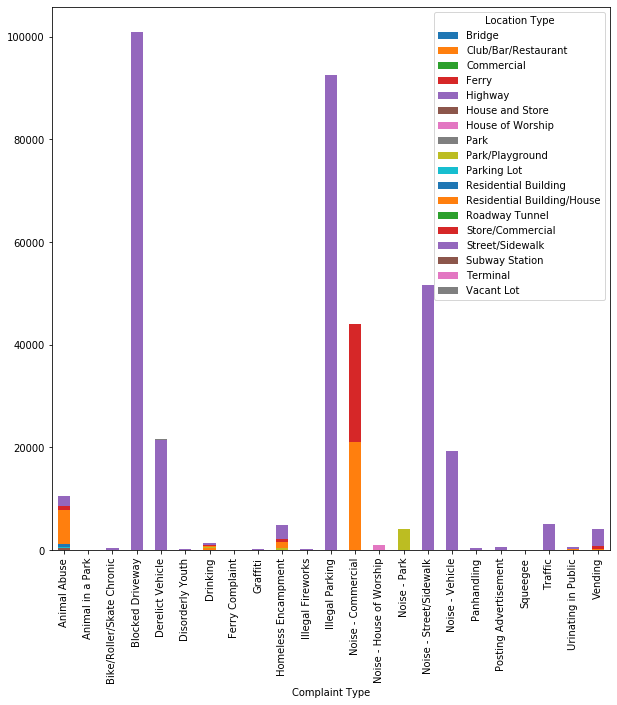

In [19]:
pd.crosstab(data['Complaint Type'],data['Location Type']).plot(kind='bar',figsize=(10,10), stacked=True)

In [20]:
data.dropna(subset = ['Closed Date','X Coordinate (State Plane)','Location Type','City','Resolution Action Updated Date'], inplace =True) # dropping the null value rows

In [21]:
data.shape #checking for the number of rows

(360305, 14)

In [22]:
data["City"].value_counts()

BROOKLYN               118588
NEW YORK                76618
BRONX                   49034
STATEN ISLAND           15320
JAMAICA                  8911
ASTORIA                  7974
FLUSHING                 7476
RIDGEWOOD                6388
CORONA                   5380
WOODSIDE                 4351
EAST ELMHURST            3555
OZONE PARK               3443
ELMHURST                 3437
SOUTH RICHMOND HILL      3430
MASPETH                  3115
WOODHAVEN                3100
LONG ISLAND CITY         3017
SOUTH OZONE PARK         2668
FRESH MEADOWS            2447
RICHMOND HILL            2333
MIDDLE VILLAGE           2290
QUEENS VILLAGE           2251
FOREST HILLS             2120
JACKSON HEIGHTS          2105
REGO PARK                1805
BAYSIDE                  1545
COLLEGE POINT            1543
FAR ROCKAWAY             1396
WHITESTONE               1367
HOLLIS                   1228
HOWARD BEACH             1142
SPRINGFIELD GARDENS      1093
ROSEDALE                 1086
SAINT ALBA

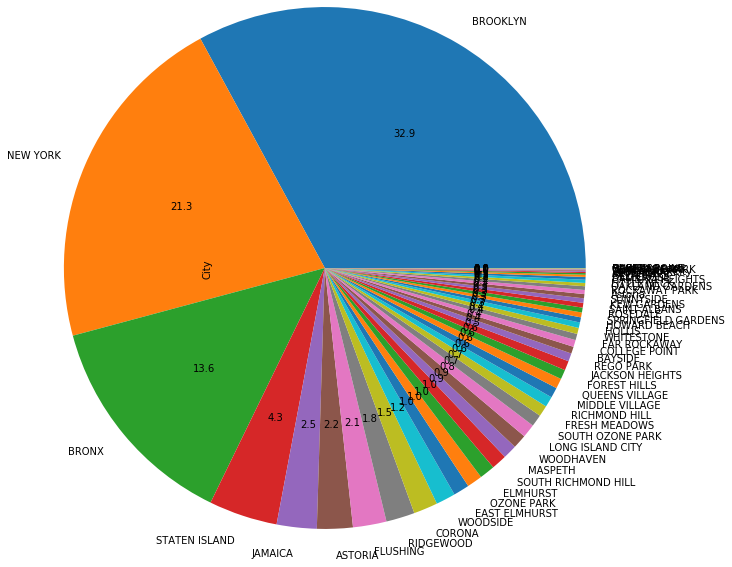

In [23]:
data["City"].value_counts().plot(kind="pie",autopct="%1.1f", radius = 3)

**Conclusion**
From the above pie chart we can infer that most of the Calls were from Brooklyn, New York and Bronx.

In [24]:
data["Location Type"].value_counts()


Street/Sidewalk               297907
Store/Commercial               24927
Club/Bar/Restaurant            21332
Residential Building/House      8850
Park/Playground                 4743
House of Worship                1059
Residential Building             529
Highway                          261
House and Store                  245
Parking Lot                      166
Commercial                       106
Vacant Lot                        95
Roadway Tunnel                    43
Subway Station                    40
Bridge                             2
Name: Location Type, dtype: int64

In [34]:
# # Unique Value 
data["Complaint Type"].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee'],
      dtype=object)

In [35]:
data["Location Type"].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge'], dtype=object)

In [36]:
data.groupby(["Complaint Type","City"]).size()

Complaint Type  City         
Animal Abuse    ARVERNE           46
                ASTORIA          170
                BAYSIDE           53
                BELLEROSE         15
                BREEZY POINT       2
                                ... 
Vending         STATEN ISLAND     25
                SUNNYSIDE         15
                WHITESTONE         1
                WOODHAVEN          6
                WOODSIDE          15
Length: 776, dtype: int64

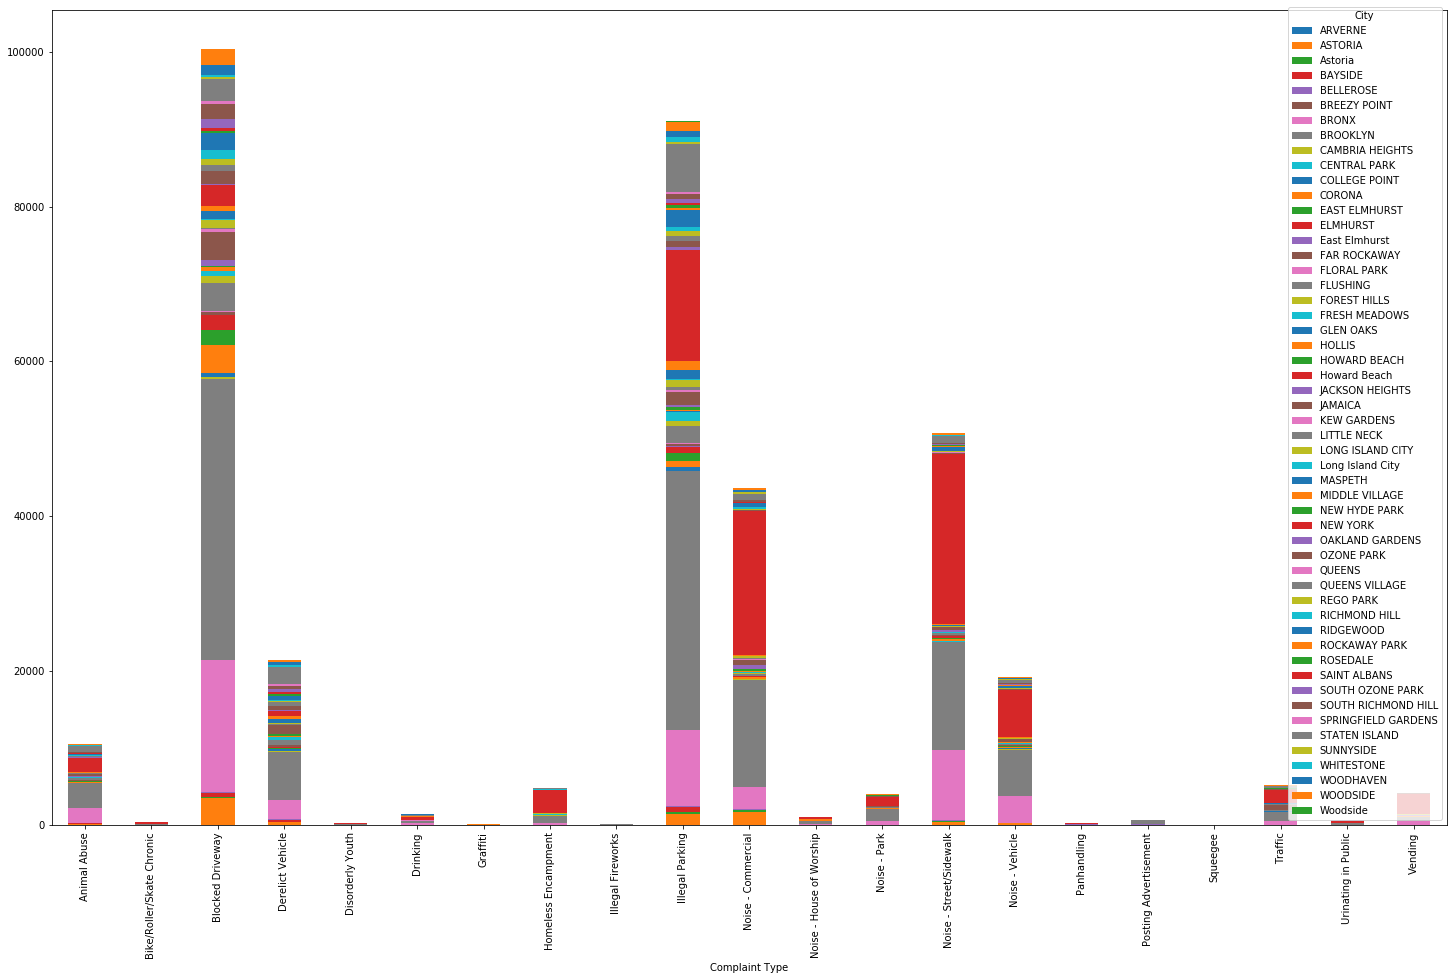

In [26]:
pd.crosstab(data["Complaint Type"],data["City"]).plot(kind="bar",figsize=(25,15),label=40, stacked = True)

**Creating the data frames having the specific city's**

In [33]:
df_Brooklyn = data[data['City']=='BROOKLYN']


In [31]:
df_Newyork = data[data['City']=='NEW YORK']


In [32]:
df_Bronx = data[data['City']=='BRONX']


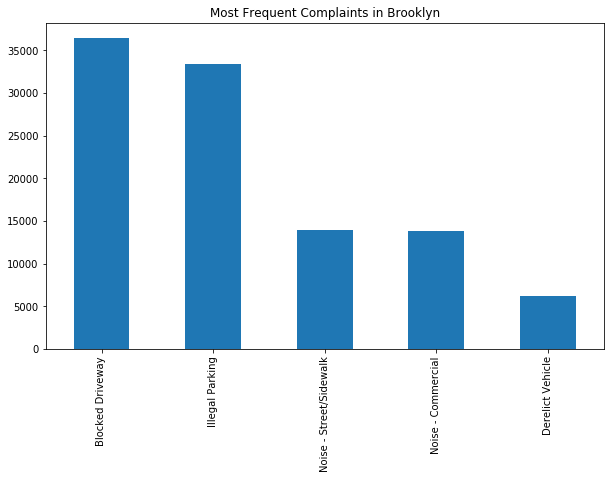

In [39]:
(df_Brooklyn['Complaint Type'].value_counts()).head().plot(kind='bar',
                                                           figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

**Conclusion**

From above graph we can find out that most of the Complaints are about Blocked Driveway

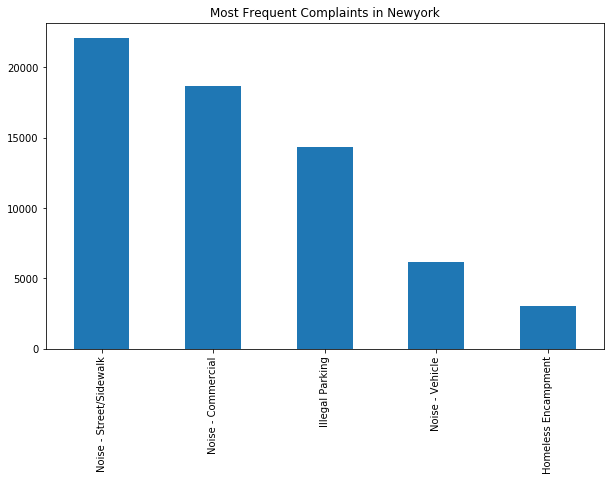

In [40]:
(df_Newyork['Complaint Type'].value_counts()).head().plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Newyork')

**Conclusion**

From above graph we can find out that most of the Complaints in New York are about Noise-Street/Sidewalk

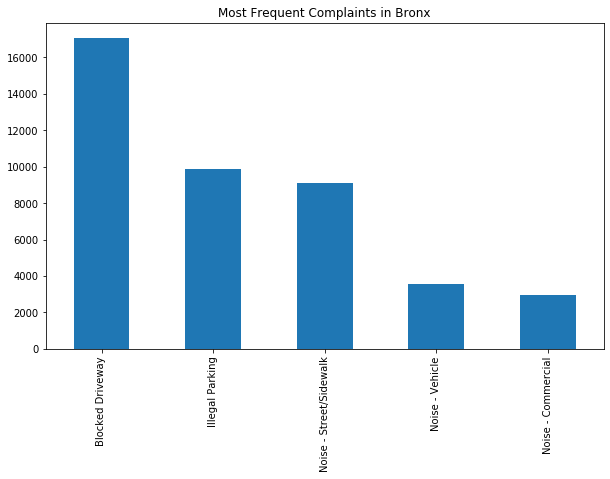

In [35]:
(df_Bronx['Complaint Type'].value_counts()).head().plot(kind='bar',figsize=(10,6),title = 'Most Frequent Complaints in Bronx')

**Conclusion**

From above graph we can find out that most of the Complaints in Brxon are about Blocked Driveway

In [42]:
# # Top 10 complaint types

data["Complaint Type"].value_counts().head(10)

Blocked Driveway           100454
Illegal Parking             91056
Noise - Street/Sidewalk     50791
Noise - Commercial          43624
Derelict Vehicle            21419
Noise - Vehicle             19122
Animal Abuse                10500
Traffic                      5162
Homeless Encampment          4820
Vending                      4162
Name: Complaint Type, dtype: int64

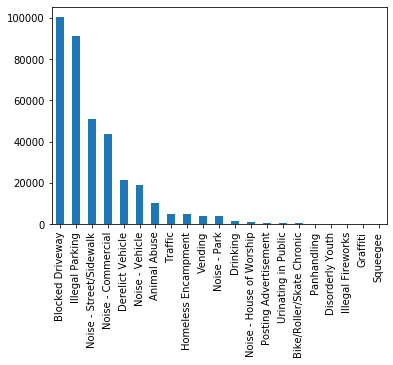

In [44]:
# # bar graph of count vs. complaint types
data["Complaint Type"].value_counts().plot(kind="bar")

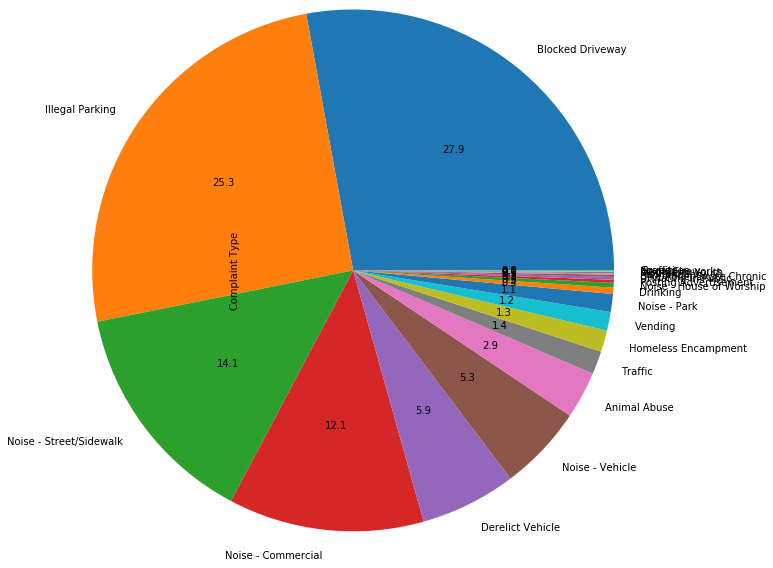

In [51]:
data["Complaint Type"].value_counts().plot(kind="pie",autopct="%1.1f", radius =3)

**Conclusion**

From above pie chart we can find out that most of the Complaints are about Blocked Driveway almost 27.9%

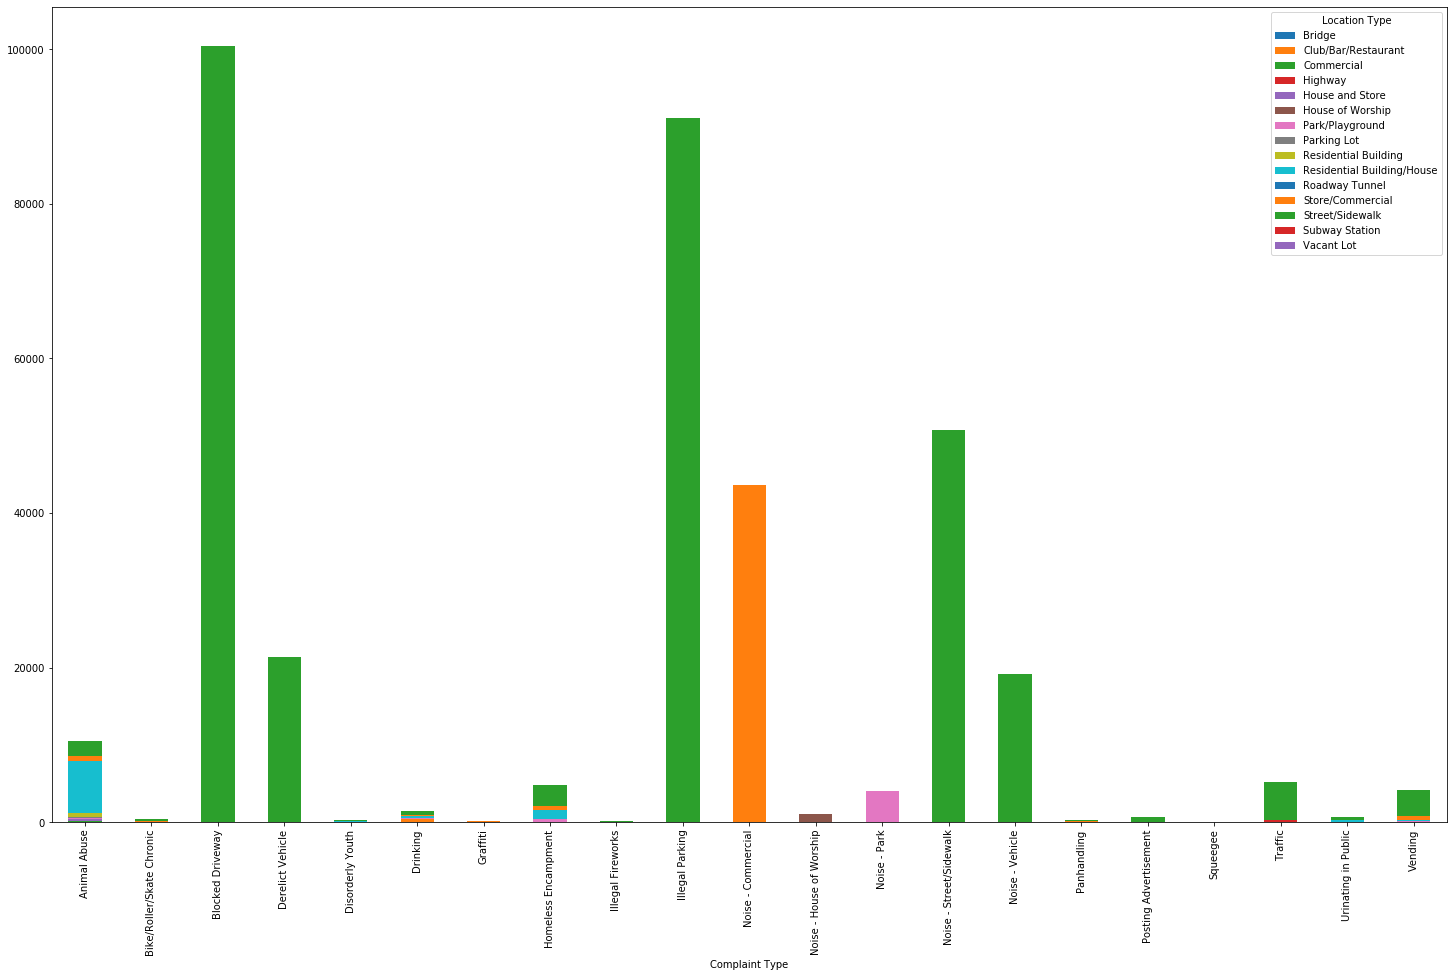

In [38]:
pd.crosstab(data["Complaint Type"],data["Location Type"]).plot(kind="bar",figsize=(25,15),label=40, stacked = True)

**Conclusion**
The above graphs is complaint type VS Location Type

# Finding the difference between the closed date and created date

In [40]:
data["TimePeriod"]=data["Closed Date"]-data["Created Date"]

data["TimePeriod"]


0        00:55:30
1        01:27:13
2        04:51:34
3        07:45:27
4        03:27:44
           ...   
364553   10:17:47
364554   02:20:34
364555   00:19:03
364556   02:40:53
364557   02:47:00
Name: TimePeriod, Length: 360305, dtype: timedelta64[ns]

In [41]:
data.groupby("Complaint Type")["TimePeriod"].max()
#We will get the maximum time ittook to resolve the issue based on complaint type

Complaint Type
Animal Abuse                21 days 15:15:16
Bike/Roller/Skate Chronic    1 days 09:54:52
Blocked Driveway             6 days 04:17:12
Derelict Vehicle             9 days 07:22:12
Disorderly Youth             1 days 04:03:27
Drinking                     3 days 22:46:12
Graffiti                     2 days 06:36:43
Homeless Encampment          3 days 19:18:44
Illegal Fireworks            1 days 03:51:10
Illegal Parking             24 days 01:21:06
Noise - Commercial          24 days 11:12:06
Noise - House of Worship     2 days 01:05:28
Noise - Park                 2 days 09:40:50
Noise - Street/Sidewalk     24 days 16:52:22
Noise - Vehicle              6 days 03:26:52
Panhandling                  6 days 01:04:56
Posting Advertisement        1 days 01:05:13
Squeegee                     0 days 06:47:12
Traffic                      3 days 02:03:25
Urinating in Public          3 days 09:11:18
Vending                      3 days 04:55:28
Name: TimePeriod, dtype: timedelta64[ns]

In [42]:
data.groupby("Complaint Type")["TimePeriod"].min()
#We will get the minimum time it took to resolve the issues based on complaint period 

Complaint Type
Animal Abuse                00:02:12
Bike/Roller/Skate Chronic   00:04:16
Blocked Driveway            00:02:51
Derelict Vehicle            00:03:42
Disorderly Youth            00:06:03
Drinking                    00:04:56
Graffiti                    00:09:23
Homeless Encampment         00:05:31
Illegal Fireworks           00:08:06
Illegal Parking             00:02:37
Noise - Commercial          00:01:01
Noise - House of Worship    00:04:20
Noise - Park                00:04:17
Noise - Street/Sidewalk     00:02:17
Noise - Vehicle             00:02:21
Panhandling                 00:05:31
Posting Advertisement       00:02:26
Squeegee                    01:10:45
Traffic                     00:04:25
Urinating in Public         00:08:36
Vending                     00:02:44
Name: TimePeriod, dtype: timedelta64[ns]

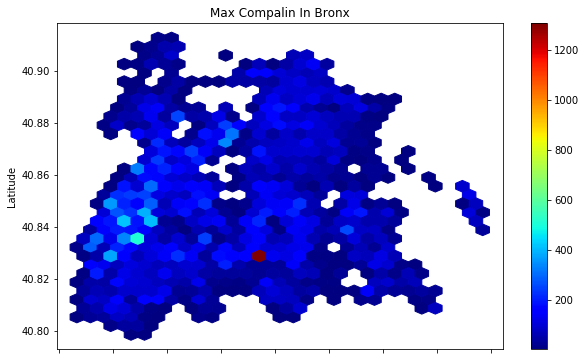

In [45]:
df_Bronx.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=30,
    colormap = 'jet',mincnt=1,title = 'Max Compalin In Bronx', figsize=(10,6))

**Conclusion**

The above graph will give us the maximum amount of the complaints in Broxon are from which area.

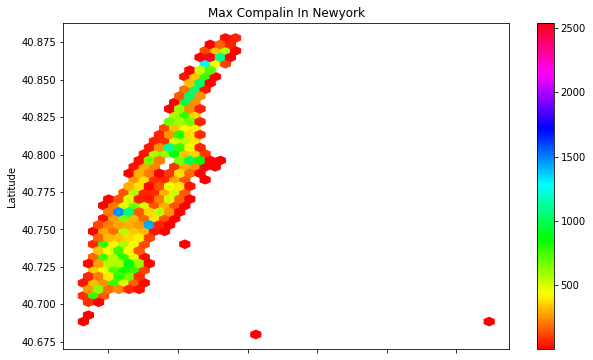

In [53]:
df_Newyork.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'hsv',mincnt=1,title = 'Max Compalin In Newyork', figsize=(10,6))

**Conclusion**

The above graph will give us the maximum amount of the complaints in New York are from which area.

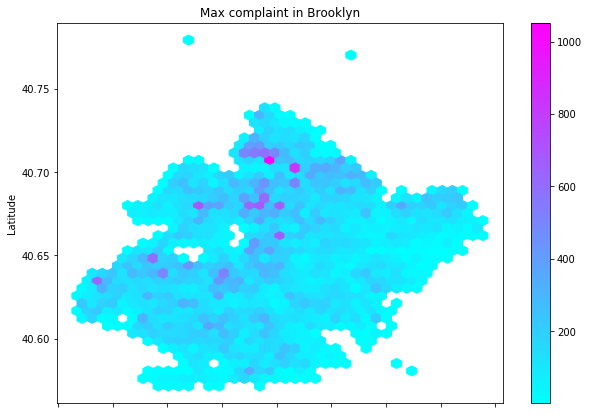

In [51]:
df_Brooklyn.plot(kind="hexbin", x= 'Longitude', y='Latitude', gridsize= 40,
                colormap ='cool',mincnt = 1, title= 'Max complaint in Brooklyn', figsize=(10,7))

**Conclusion**

The above graph will give us the maximum amount of the complaints in Brooklyn are from which area.